In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [355]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [357]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [358]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

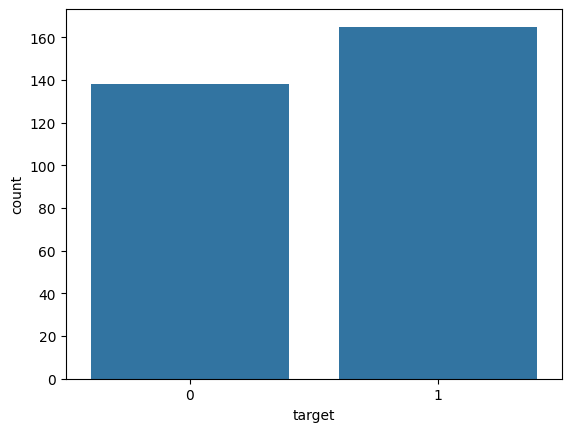

In [359]:
sns.countplot(data=df, x = "target")

<Axes: >

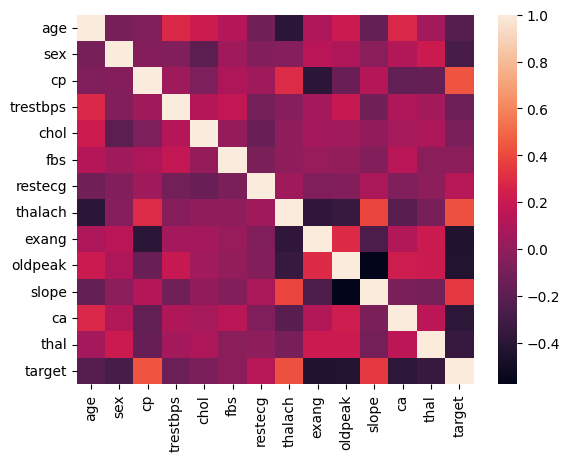

In [360]:
sns.heatmap(data=df.corr(), annot=False)

In [361]:
X = df.drop("target",axis = 1)
y = df["target"]

In [362]:
polynomial_convertor = PolynomialFeatures(degree=4 , include_bias=False)
poly_features = polynomial_convertor.fit_transform(X)

In [363]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.1, random_state=101)

In [364]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [365]:
model = LogisticRegression(fit_intercept=True , max_iter=1000)
model.fit(scaled_X_train,y_train)

LogisticRegression(max_iter=1000)

In [366]:
model_cv = LogisticRegressionCV(fit_intercept=True , max_iter=1000)
model_cv.fit(scaled_X_train,y_train)

LogisticRegressionCV(max_iter=1000)

In [367]:
model.coef_

array([[-0.21721698, -0.10624448, -0.06071929, ...,  0.06902073,
        -0.03877558, -0.22626336]])

In [368]:
y_pred = model.predict(scaled_X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [369]:
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report,
                             precision_score,
                             recall_score,
                             PrecisionRecallDisplay,
                             RocCurveDisplay)

In [370]:
accuracy_score(y_test, y_pred)

0.9354838709677419

In [371]:
conf_matrix_cv = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(f"LoR_CV has Confusion Matrix as\n{conf_matrix_cv}")

LoR_CV has Confusion Matrix as
[[13  2]
 [ 0 16]]


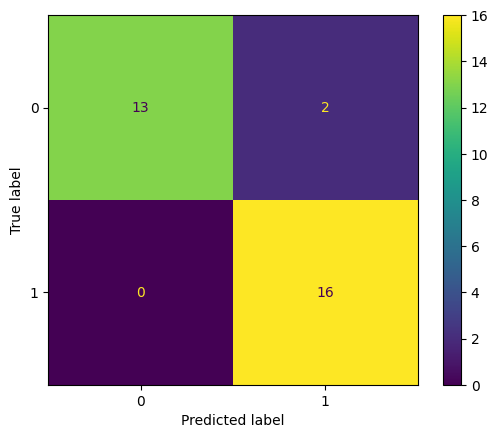

In [372]:
plot_conf_matrix = ConfusionMatrixDisplay.from_estimator(model,
                                                         scaled_X_test,
                                                         y_test)

In [373]:
recall_scr = recall_score(y_true=y_test,y_pred=y_pred)
print(f"LoR_CV has Recall Score as\n{recall_scr}")

LoR_CV has Recall Score as
1.0


In [374]:
prec_scr = precision_score(y_true=y_test,y_pred=y_pred)
print(f"LoR_CV has Precision Score as\n{prec_scr}")

LoR_CV has Precision Score as
0.8888888888888888


In [375]:
class_rep_str = classification_report(y_true=y_test,y_pred=y_pred)
print(class_rep_str)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.89      1.00      0.94        16

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



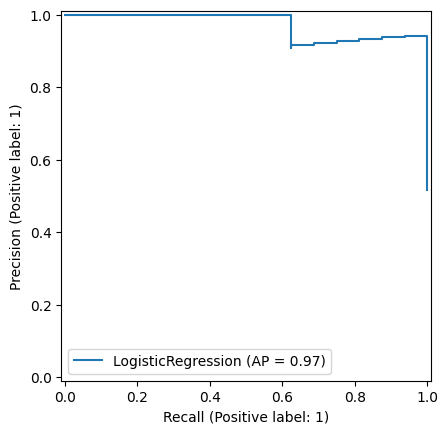

In [376]:
plot_AUC = PrecisionRecallDisplay.from_estimator(model,
                                                 scaled_X_test,
                                                 y_test)

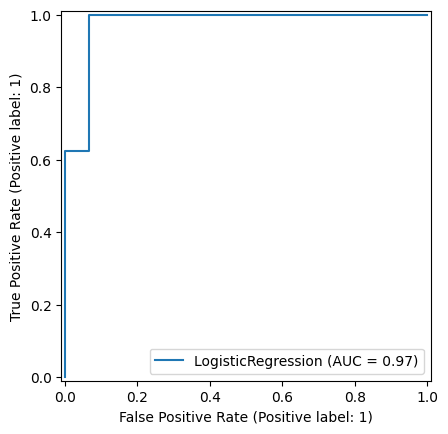

In [377]:
plot_ROC = RocCurveDisplay.from_estimator(model,
                                          scaled_X_test,
                                          y_test)

In [378]:
final_poly_convertor = PolynomialFeatures(degree=4,include_bias=False)
final_model = LogisticRegression(max_iter=1000)
poly_X = final_poly_convertor.fit_transform(X)
final_model.fit(scaler.fit_transform(poly_X),y)

LogisticRegression(max_iter=1000)

In [388]:
accuracy_score(y_true=y,y_pred=final_model.predict(scaler.fit_transform(poly_X)))

0.9900990099009901

In [389]:
recall_score(y_true=y,y_pred=final_model.predict(scaler.fit_transform(poly_X)))

1.0

In [379]:
from joblib import dump,load

In [380]:
dump(final_model,"heart_lor_model_240208.joblib")

['heart_lor_model_240208.joblib']

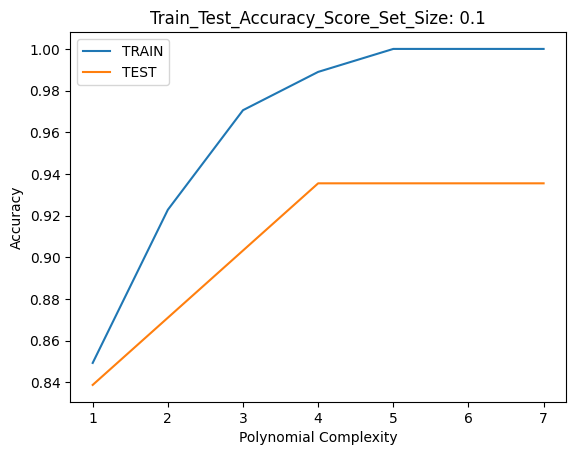

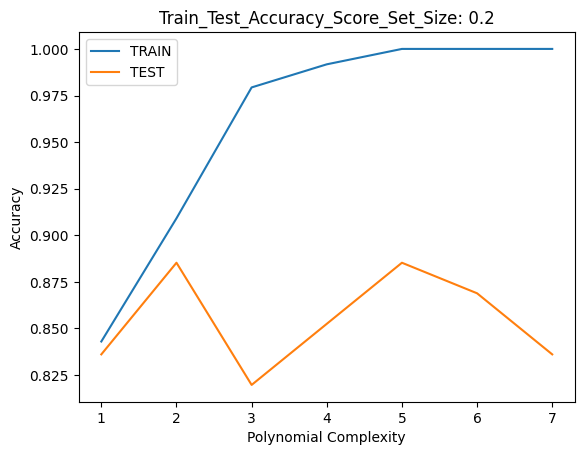

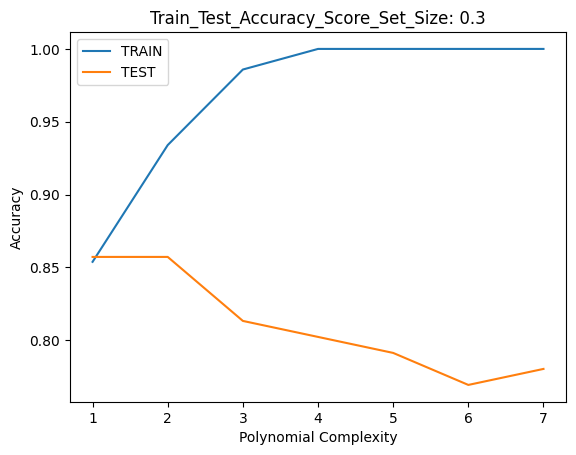

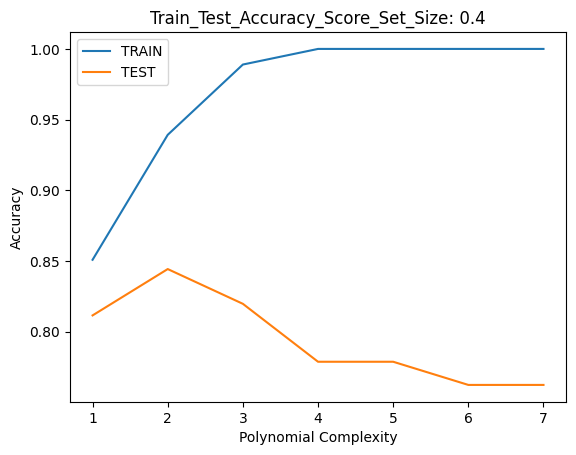

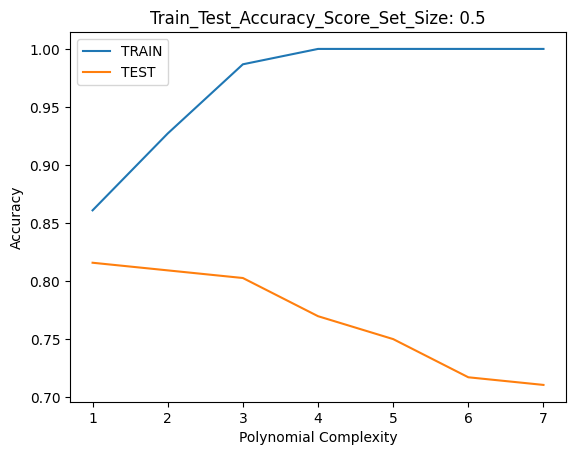

In [381]:
def Lor_accuracy_score(test_size, max_degree=7):
    train_accuracy_list = []
    test_accuracy_list = []

    for d in range(1, max_degree + 1):
        # create poly-convertor
        polynomial_convertor = PolynomialFeatures(degree=d, include_bias=False)
        # Create our Poly X
        poly_features = polynomial_convertor.fit_transform(X)
        # train_test_split
        X_train, X_test, y_train, y_test = train_test_split(poly_features,
                                                            y,
                                                            test_size=test_size,
                                                            random_state=101)
        # scaling
        scaler = StandardScaler()
        scaled_X_train = scaler.fit_transform(X_train)
        scaled_X_test = scaler.transform(X_test)

        # Train our model
        model = LogisticRegression(fit_intercept=True , max_iter=1000)
        model.fit(scaled_X_train, y_train)

        # Calculate and collect accuracy score
        train_pred = model.predict(scaled_X_train)
        test_pred = model.predict(scaled_X_test)

        train_accuracy = accuracy_score(y_train, train_pred)
        test_accuracy = accuracy_score(y_test, test_pred)

        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)

    plt.plot(range(1, max_degree + 1), train_accuracy_list, label='TRAIN')
    plt.plot(range(1, max_degree + 1), test_accuracy_list, label='TEST')
    plt.xlabel("Polynomial Complexity")
    plt.ylabel("Accuracy")
    plt.title(f"Train_Test_Accuracy_Score_Set_Size: {test_size}")
    plt.legend()
    plt.show()

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
for test_size in test_sizes:
    Lor_accuracy_score(test_size)


Degree: 1, Test Size: 0.1, Accuracy: 0.8387096774193549


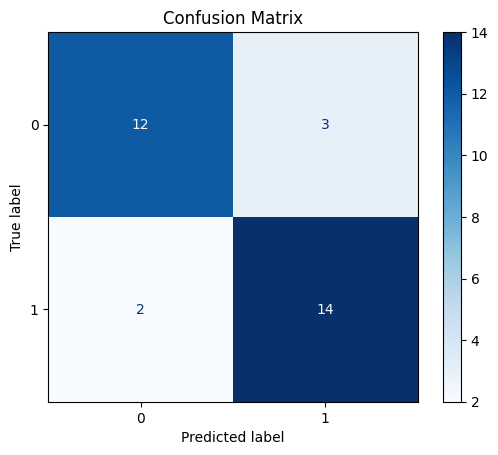

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



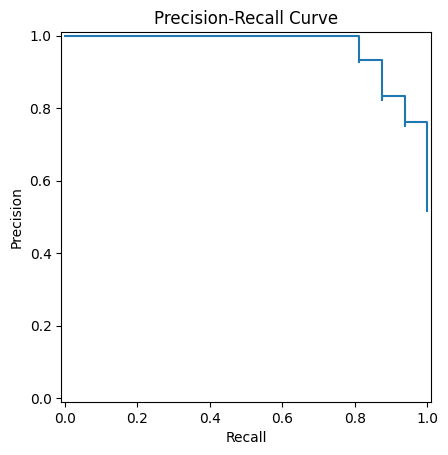

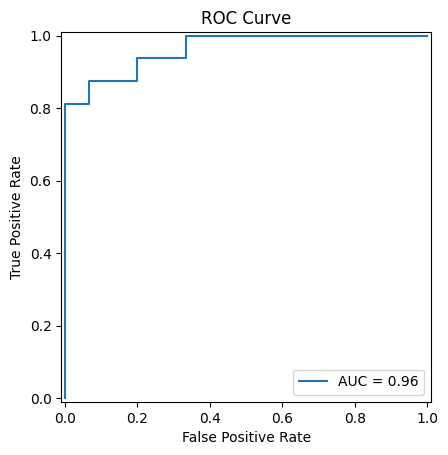

Degree: 1, Test Size: 0.2, Accuracy: 0.8360655737704918


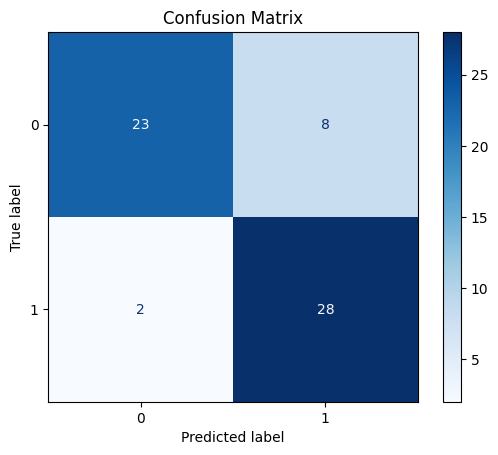

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



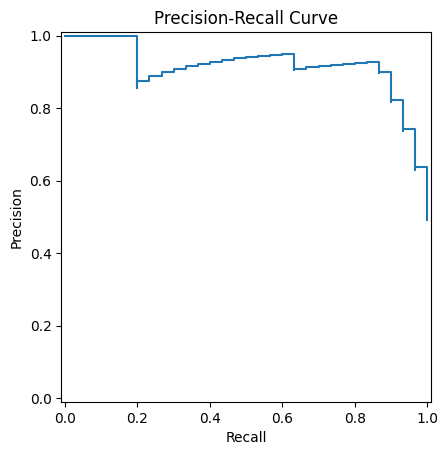

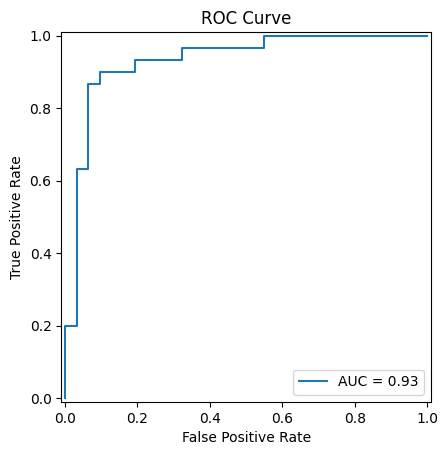

Degree: 1, Test Size: 0.3, Accuracy: 0.8571428571428571


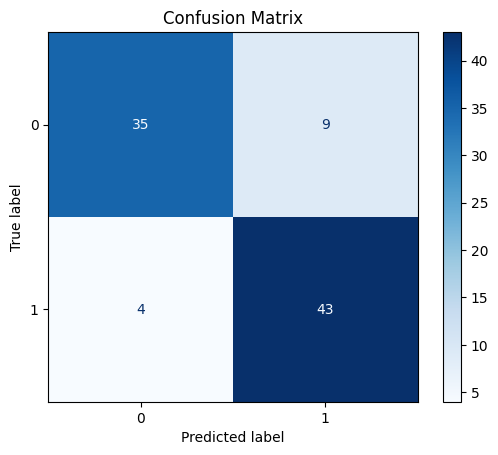

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.83      0.91      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



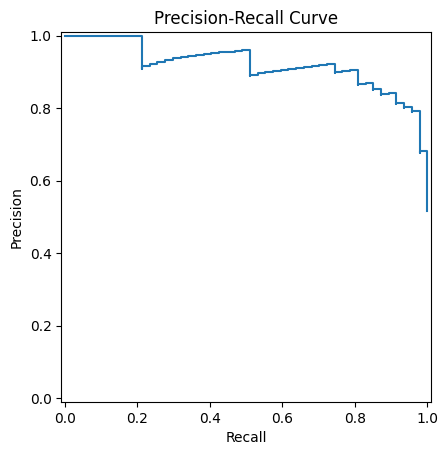

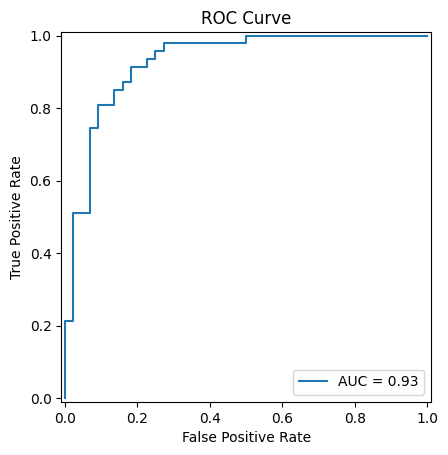

Degree: 2, Test Size: 0.1, Accuracy: 0.8709677419354839


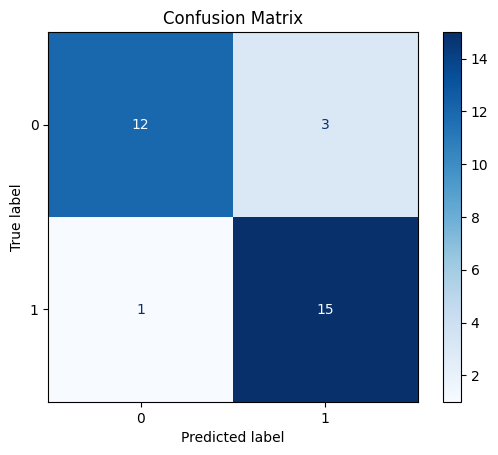

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.83      0.94      0.88        16

    accuracy                           0.87        31
   macro avg       0.88      0.87      0.87        31
weighted avg       0.88      0.87      0.87        31



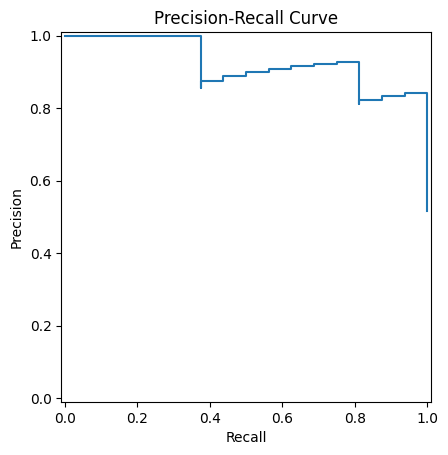

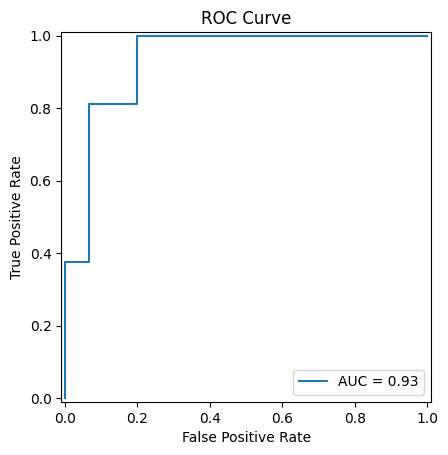

Degree: 2, Test Size: 0.2, Accuracy: 0.8852459016393442


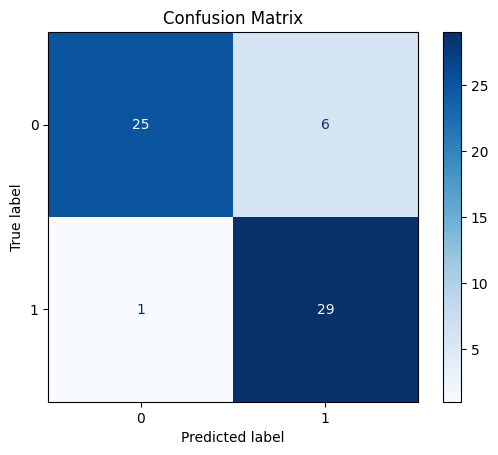

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        31
           1       0.83      0.97      0.89        30

    accuracy                           0.89        61
   macro avg       0.90      0.89      0.88        61
weighted avg       0.90      0.89      0.88        61



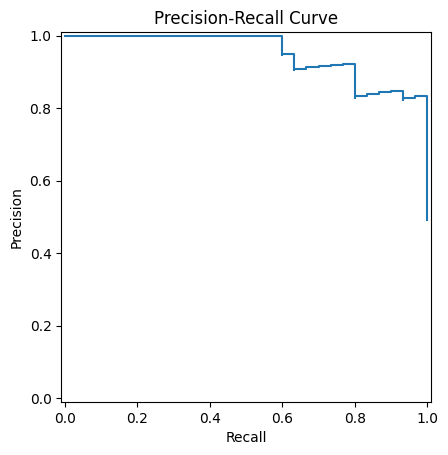

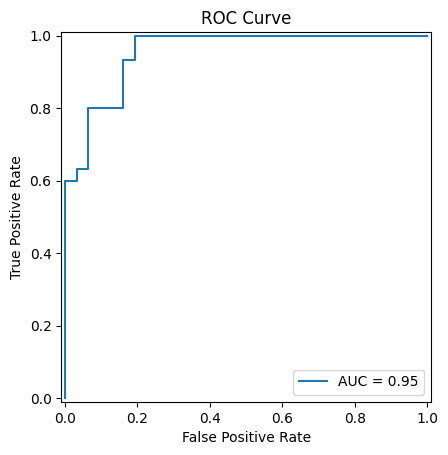

Degree: 2, Test Size: 0.3, Accuracy: 0.8571428571428571


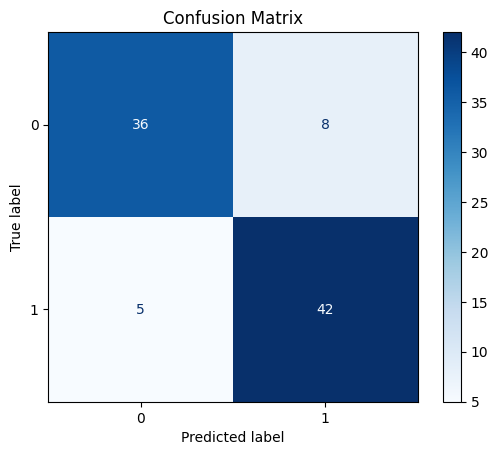

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        44
           1       0.84      0.89      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



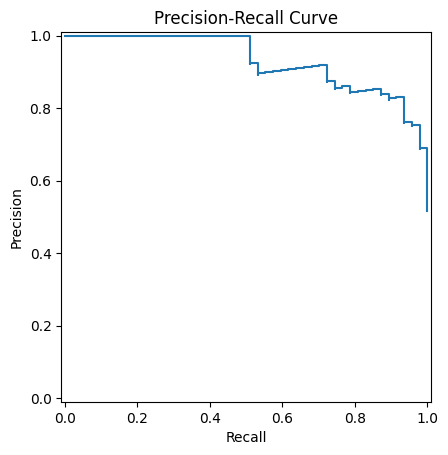

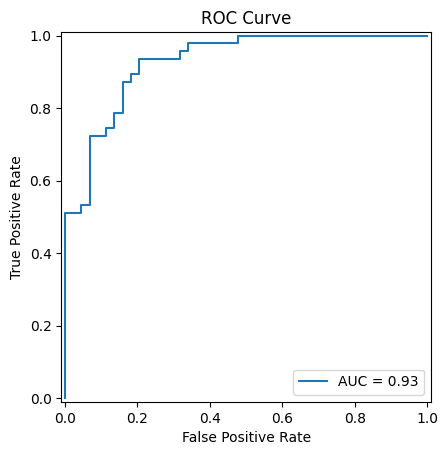

Degree: 3, Test Size: 0.1, Accuracy: 0.9032258064516129


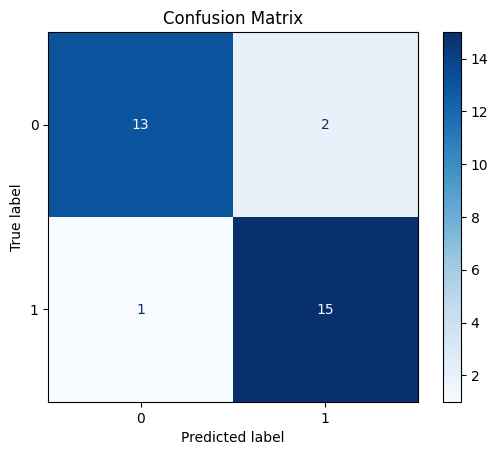

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.88      0.94      0.91        16

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31



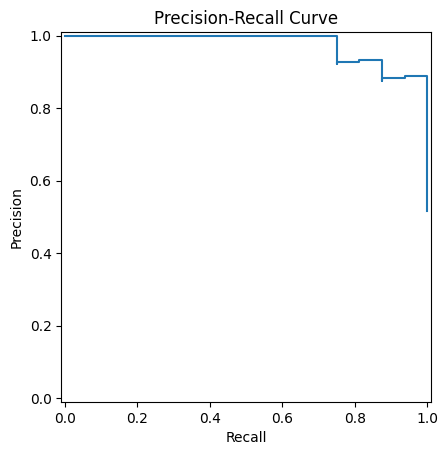

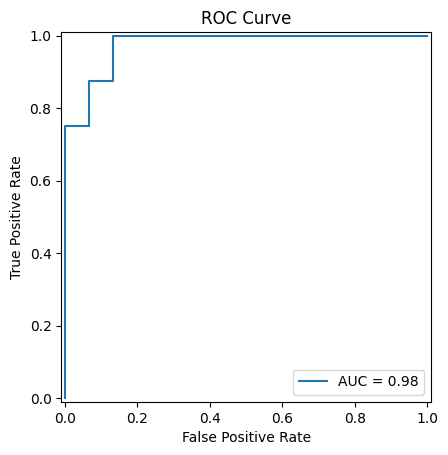

Degree: 3, Test Size: 0.2, Accuracy: 0.819672131147541


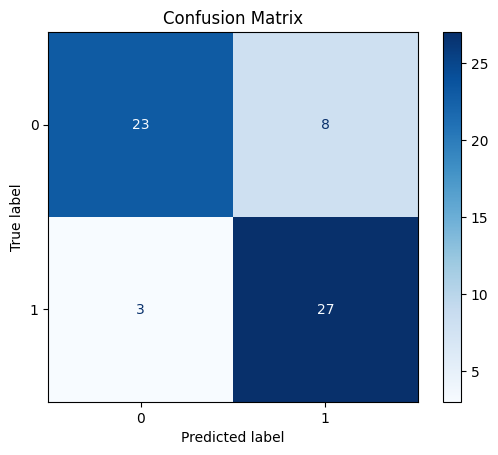

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



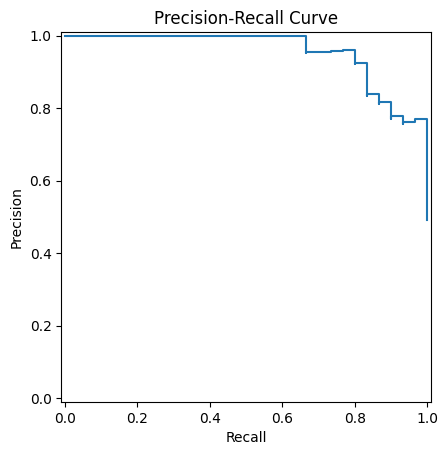

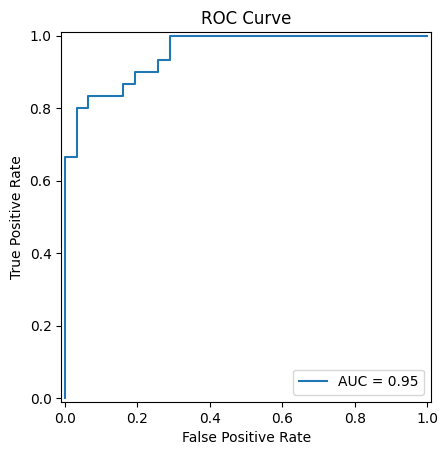

Degree: 3, Test Size: 0.3, Accuracy: 0.8131868131868132


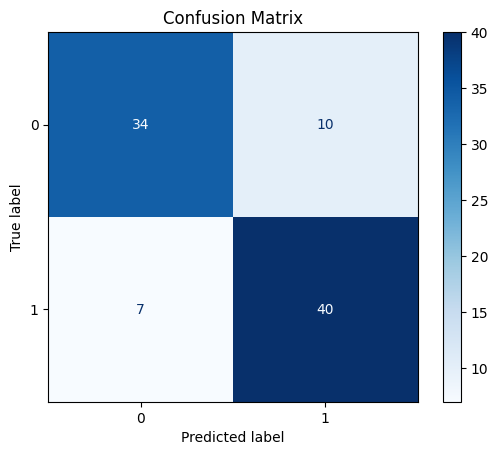

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        44
           1       0.80      0.85      0.82        47

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



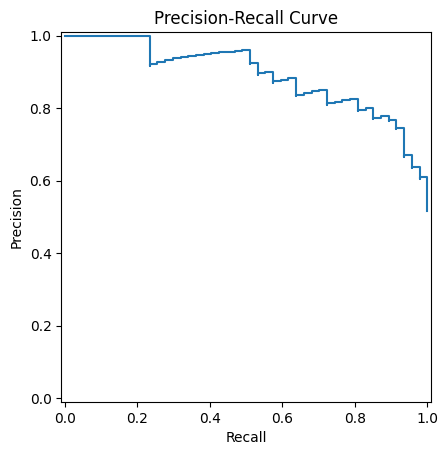

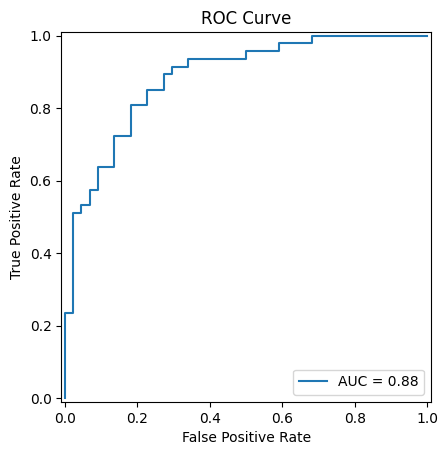

Degree: 4, Test Size: 0.1, Accuracy: 0.9354838709677419


c:\Users\ericb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


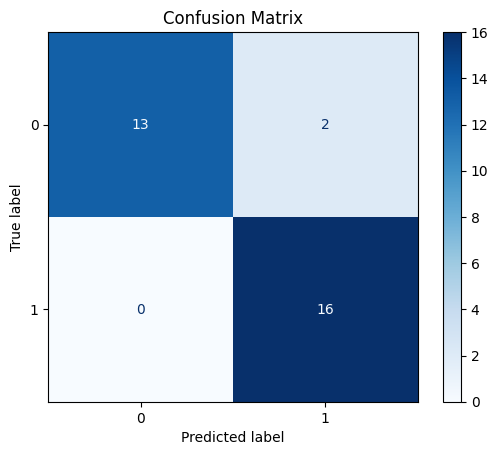

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.89      1.00      0.94        16

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



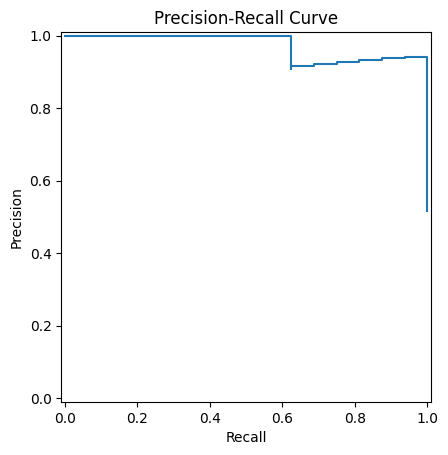

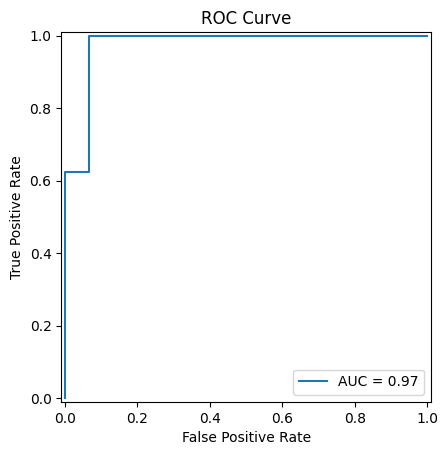

Degree: 4, Test Size: 0.2, Accuracy: 0.8524590163934426


c:\Users\ericb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


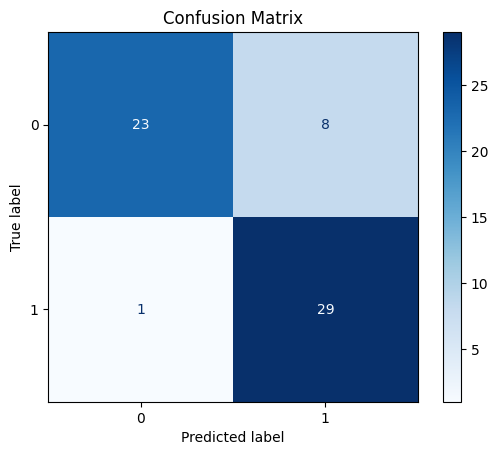

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.87        30

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



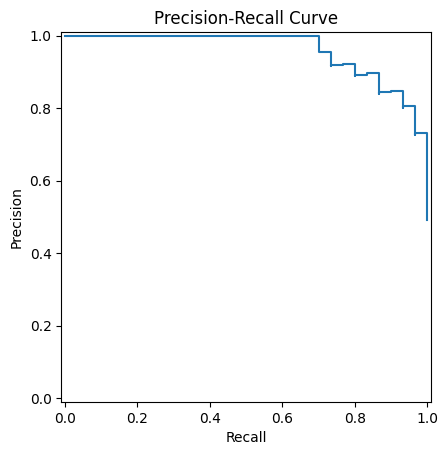

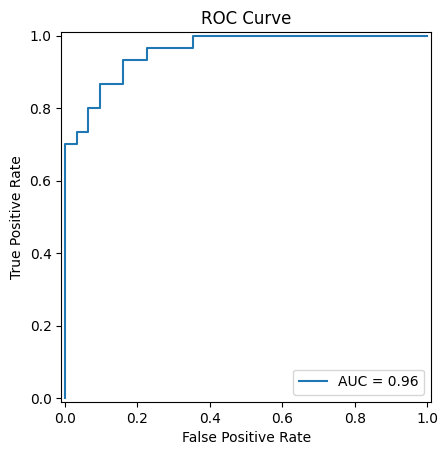

Degree: 4, Test Size: 0.3, Accuracy: 0.8021978021978022


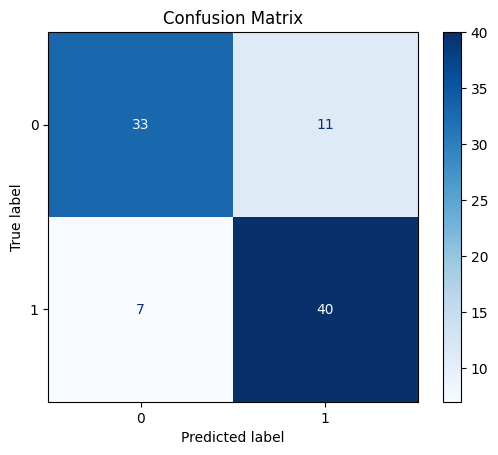

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79        44
           1       0.78      0.85      0.82        47

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



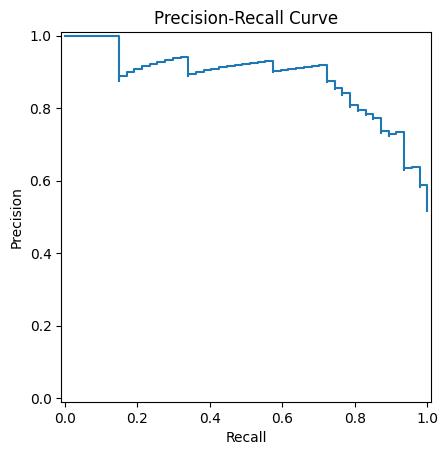

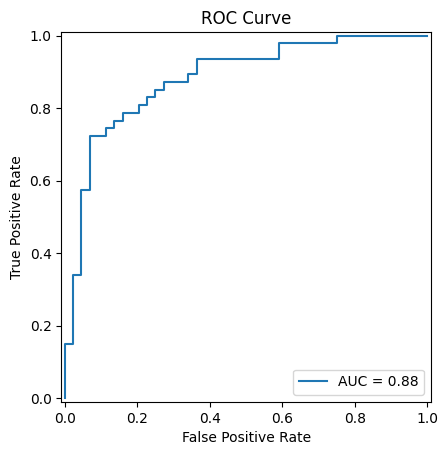

In [382]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, roc_curve, auc, precision_recall_curve)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

degrees = [1, 2, 3, 4]
test_sizes = [0.1, 0.2, 0.3]

for degree in degrees:
    for test_size in test_sizes:
        # Create logistic regression model with polynomial features and scaling
        model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LogisticRegression())
        
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predictions
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
        
        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Degree: {degree}, Test Size: {test_size}, Accuracy: {accuracy}')
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp_cm.plot(cmap='Blues', values_format='d')
        plt.title('Confusion Matrix')
        plt.show()
        
        # Classification Report
        print('Classification Report:')
        print(classification_report(y_test, y_pred))
        
        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        disp_pr = PrecisionRecallDisplay(precision=precision, recall=recall)
        disp_pr.plot()
        plt.title('Precision-Recall Curve')
        plt.show()
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        disp_roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        disp_roc.plot()
        plt.title('ROC Curve')
        plt.show()

In [383]:
test_data = pd.DataFrame({
    'age': [63, 37, 41, 56, 57],
    'sex': [1, 1, 0, 1, 0],
    'cp': [3, 2, 1, 1, 0],
    'trestbps': [145, 130, 130, 120, 120],
    'chol': [233, 250, 204, 236, 354],
    'fbs': [1, 0, 0, 0, 0],
    'restecg': [0, 1, 0, 1, 1],
    'thalach': [150, 187, 172, 178, 163],
    'exang': [0, 0, 0, 0, 1],
    'oldpeak': [2.3, 3.5, 1.4, 0.8, 0.6],
    'slope': [0, 0, 2, 2, 2],
    'ca': [0, 0, 2, 2, 2],
    'thal': [1, 2, 2, 2, 2],
})

In [384]:
test_10 = test_data.iloc[0:1].values.tolist()
test_20 = test_data.iloc[1:2].values.tolist()
test_30 = test_data.iloc[2:3].values.tolist()
test_40 = test_data.iloc[3:4].values.tolist()
test_50 = test_data.iloc[4:5].values.tolist()

In [385]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [386]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [387]:
test_1 = [[48,1,2,135,289,0,1,164,0,1.8,2,0,2]]
test_2 = [[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]
test_3 = [[57,1,0,130,131,0,1,115,1,1.2,1,1,3]]
test_4 = [[45,1,3,110,264,0,1,132,0,1.2,1,0,3]]
test_5 = [[57,0,0,140,241,0,1,123,1,0.2,1,0,3]]
test_6 = [[44,1,0,120,169,0,1,144,1,2.8,0,0,1]]
test_erik = [[25,1,3,120,240,1,2,220,1,4,2,3,5]]
test_poly = final_poly_convertor.transform(test_erik)
result = final_model.predict(test_poly)
result

c:\Users\ericb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([1], dtype=int64)